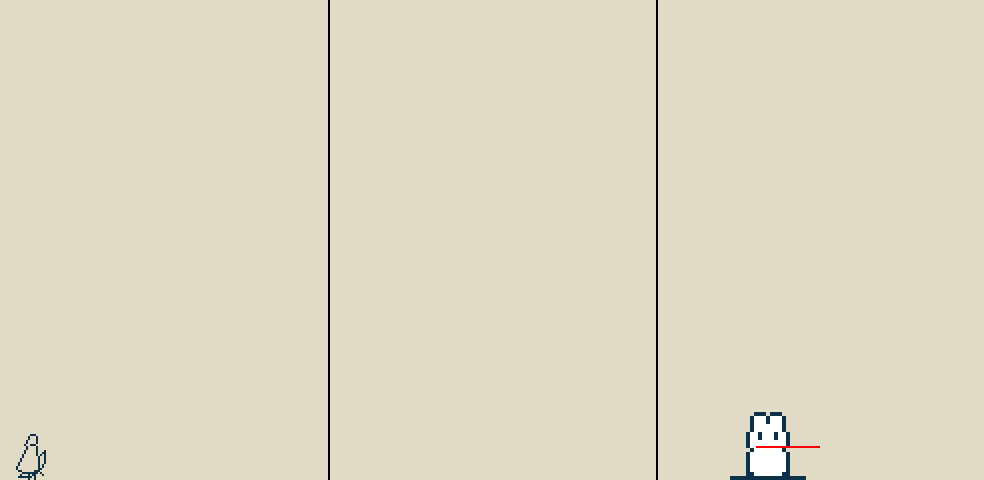

In [159]:
%load_ext autoreload
%autoreload 2

from IPython.display import display, clear_output
import ipywidgets as widgets
from renderer import Renderer, shoot, update
from PIL.Image import Image, open as open_image, new as new_image, Resampling
import imagehash
import io

slider = widgets.IntSlider(value=10, min=1, max=15)
shoot_button = widgets.Button(description='Выстрел')
shoot_button.on_click(lambda _: _shoot(slider.value))
update_button = widgets.Button(description='Обновить')
update_button.on_click(lambda _: _update())
gui = widgets.VBox([update_button, slider, shoot_button])
renderer = Renderer()

last_hash = ""
f= None

def _draw_screen():
    global last_hash, f
    clear_output()
    display(gui)
    f = renderer.render()

    # print(last_hash)
    # last_hash = average_hash(f, hash_size=16)
    # print(last_hash)

    display(f)



def _shoot(d):
    shoot(int(d))

    _draw_screen()

def _update():
    update()
    _draw_screen()

_update()




